In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import doc_provenance
parent_directory = str(Path().resolve().parent)
parent_directory

import os,sys 
script_path = os.path.abspath("../src")  # Adjust the path
sys.path.append(script_path)
print(parent_directory)

import json 
import tiktoken

def read_json(path):
    if not os.path.exists(path):
        print('File not found!', path)
        return None
    with open(path, "r", encoding="utf-8") as file:
        data = json.load(file)
    return data

def count_tokens(text, model="gpt-4o-mini"):
    encoder = tiktoken.encoding_for_model(model)  # Get the tokenizer for the specific model
    tokens = encoder.encode(text)  # Encode text into tokens
    return len(tokens)

def write_json_to_file(filename, data):
    with open(filename, "w") as f:
        json.dump(data, f, indent=4)

import statistics

def find_substantially_large(values, factor=2):
    """
    Find and return the values in the list that are substantially larger than the average.
    
    A value is considered substantially large if it is greater than:
        mean + (factor * standard deviation)
    
    Parameters:
        values (list of numbers): The list of values to analyze.
        factor (float): The number of standard deviations above the mean 
                        that a value must be to be considered substantially large.
                        Default is 2.
    
    Returns:
        list: A list of values that exceed the threshold.
    """
    if not values:
        return [], 0 
    
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    threshold = mean + factor * stdev
    return [v for v in values if v > threshold], mean



/Users/yiminglin/Documents/Codebase/doc-provenance


[nltk_data] Downloading package punkt to /Users/yiminglin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yiminglin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yiminglin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yiminglin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# eval LLM_vanilla accuracy 

def test_accuracy_vanilla_LLM(result_folder, out_path):
    folder = Path(result_folder)
    file_paths = [str(file) for file in folder.iterdir() if file.is_file()]
    cnt = 0
    true_cnt = 0
    logs = {}
    for file in file_paths:
        filename = os.path.basename(file)
        print(filename)
        log = {}
        if '.json' not in file:
            continue
        object = read_json(file)
        if 'status' in object:
            if object['status'] == 'NA':
                continue
        cnt += 1
        question = object['question']
        answers = object['answers']
        provenance = object['provenance']
        title = object['title']
        new_ans, in_tokens, out_tokens = doc_provenance.QA(question, provenance)
        # print(question)
        # print(answers)
        # print(new_ans)
        log['vanilla_LLM_ans'] = new_ans
        log['doc_ans'] = answers 
        log['provenance'] = provenance
        if doc_provenance.equal(answers, new_ans, question, 'LLM'):
            print('Matched!', answers, new_ans, true_cnt+1, cnt, title)
            log['is_match'] = 1
            true_cnt += 1
        else:
            log['is_match'] = 0
        logs[filename] = log 
     
    
    accuracy = true_cnt/cnt

    write_json_to_file(out_path, logs)

    return accuracy, cnt, true_cnt 

In [ ]:
model_name = 'gpt4omini'
data = 'paper'

doc_provenance.set_model(model_name)
result_folder = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/results_vanilla_LLM/'
out_path = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/vanilla_LLM_eval_logs.json' 

accuracy, cnt, true_cnt = test_accuracy_vanilla_LLM(result_folder, out_path)

print(accuracy)

89_1911.11750_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['- Term Frequency - Inverse Document Frequency (TF-IDF)\n- Vector space model (VSM)'] ['- Term Frequency - Inverse Document Frequency (TF-IDF)\n- Vector space model (VSM)'] 1 1 1911.11750
285_1910.03814_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['1. Feature Concatenation Model (FCM)\n2. Spatial Concatenation Model (SCM)\n3. Textual Kernels Model (TKM)'] ['1. Feature Concatenation Model (FCM)\n2. Spatial Concatenation Model (SCM)\n3. Textual Kernels Model (TKM)'] 2 2 1910.03814
206_1805.02400_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['Yelp Challenge dataset'] ['Yelp Challenge dataset'] 3 3 1805.02400
405_1811.00942_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
192_1710.01492_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
65_1910.04601_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
227_1909.11189_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['

In [13]:
model_name = 'gpt4omini'
data = 'hotpotQA'

doc_provenance.set_model(model_name)
result_folder = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/results_vanilla_LLM/'
out_path = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/vanilla_LLM_eval_logs.json' 

accuracy, cnt, true_cnt = test_accuracy_vanilla_LLM(result_folder, out_path)

print(accuracy)

364_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
246_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['Firth of Forth'] ['Firth of Forth'] 1 1 hotpot_dev_fullwiki_v1.json
487_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
117_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
329_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
gpt4omini gpt4omini
373_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
251_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['2012, Pac-12 Conference'] ['2012, Pac-12 Conference'] 2 4 hotpot_dev_fullwiki_v1.json
490_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['Cinematographer and film director.'] ['Cinematographer and film director.'] 3 5 hotpot_dev_fullwiki_v1.json
248_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gpt4omini.json
154_hotpo

In [14]:
model_name = 'gpt4omini'
data = 'nl_dev'

doc_provenance.set_model(model_name)
result_folder = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/results_vanilla_LLM/'
out_path = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/vanilla_LLM_eval_logs.json' 

accuracy, cnt, true_cnt = test_accuracy_vanilla_LLM(result_folder, out_path)

print(accuracy)

165_-7709111104155953766_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['Donald Trump'] ['Donald Trump'] 1 1 -7709111104155953766
29_8588157975437869890_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ["The song relates to both the Old and New Testaments, reflecting the Israelites' escape from Egypt and referring to healing as described in John 5:4. It is also associated with the Underground Railroad, providing instructions to fugitive slaves on how to avoid capture."] ['The lyrics of "Wade in the Water" convey themes of escape, healing, and guidance, reflecting the Israelites\' liberation from Egypt and providing instructions for fugitive slaves to evade capture by entering the water.'] 2 2 8588157975437869890
293_2750109669430963686_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini
Matched! ['In stems, roots, and leaves.'] ['In stems, roots, and leaves.'] 3 3 2750109669430963686
303_-3290814144789249484_LLM_vanilla_null_gpt4omini.json
gpt4omini gpt4omini

In [17]:
model_name = 'gemini2flash'
data = 'nl_dev'

doc_provenance.set_model(model_name)
result_folder = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/results_vanilla_LLM/'
out_path = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/vanilla_LLM_eval_logs.json' 

accuracy, cnt, true_cnt = test_accuracy_vanilla_LLM(result_folder, out_path)

print(accuracy)

411_-4482484688035625980_LLM_vanilla_null_gemini2flash.json
496_7413826602347108802_LLM_vanilla_null_gemini2flash.json
310_-1330515253963834494_LLM_vanilla_null_gemini2flash.json
394_6038338714916455398_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
374_-5553680830538399399_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
300_-8899928590244132355_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
289_-7156311873296217154_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
383_2991709613727685350_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['Monthly'] ['Monthly'] 1 7 2991709613727685350
363_-7394149107458430124_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['2018'] ['2018'] 2 8 -7394149107458430124
316_-3738762685792121994_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['Ratatouille'] ['Ratatouille'] 3 9 -3738762685792121994
372_3785646210182534178_LLM_vanilla_null_gemin

In [18]:
model_name = 'gemini2flash'
data = 'paper'

doc_provenance.set_model(model_name)
result_folder = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/results_vanilla_LLM/'
out_path = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/vanilla_LLM_eval_logs.json' 

accuracy, cnt, true_cnt = test_accuracy_vanilla_LLM(result_folder, out_path)

print(accuracy)

114_1909.06762_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['BLEU, Micro Entity F1'] ['BLEU, Micro Entity F1'] 1 1 1909.06762
465_1909.00997_LLM_vanilla_null_gemini2flash.json
178_1909.05358_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['23'] ['23'] 2 2 1909.05358
379_2001.02380_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['$ \\Delta_s = P(rel \\mid t_1, ..., t_N) - P(rel \\mid X_{mask=i}) $'] ['$\\Delta_s = P(rel \\mid t_1, ..., t_N) - P(rel \\mid X_{mask=i})$'] 3 3 2001.02380
10_1810.04528_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['Brazilian Portuguese'] ['Brazilian Portuguese'] 4 4 1810.04528
111_2001.07209_LLM_vanilla_null_gemini2flash.json
58_1910.09399_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
443_1902.00821_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['DrQA'] ['DrQA'] 5 6 1902.00821
70_1804.10686_LLM_vanilla_null_gemini2flash.json

In [19]:
model_name = 'gemini2flash'
data = 'hotpotQA'

doc_provenance.set_model(model_name)
result_folder = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/results_vanilla_LLM/'
out_path = '/Users/yiminglin/Documents/Codebase/doc_provenance_results/' + model_name  + '/eval' + '/' + data + '/vanilla_LLM_eval_logs.json' 

accuracy, cnt, true_cnt = test_accuracy_vanilla_LLM(result_folder, out_path)

print(accuracy)

106_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['George Raft'] ['George Raft'] 1 1 hotpot_dev_fullwiki_v1.json
103_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gemini2flash.json
400_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gemini2flash.json
405_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['1974 through 1983'] ['1974 through 1983'] 2 3 hotpot_dev_fullwiki_v1.json
191_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['Oregon Ducks'] ['Oregon Ducks'] 3 4 hotpot_dev_fullwiki_v1.json
194_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
Matched! ['Murray Hill, New Jersey'] ['Murray Hill, New Jersey'] 4 5 hotpot_dev_fullwiki_v1.json
497_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gemini2flash.json
gemini2flash gemini2flash
492_hotpot_dev_fullwiki_v1.json_LLM_vanilla_null_gemini2flash.json
gemi

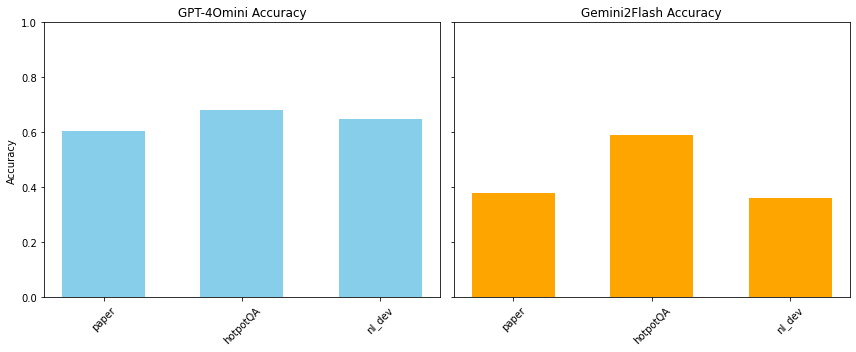

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
datasets = ['paper', 'hotpotQA', 'nl_dev']
gpt4omini_scores = [0.6047008547008547, 0.6807017543859649, 0.6484149855907781]
gemini2flash_scores = [0.3793103448275862, 0.5899053627760252, 0.3602941176470588]

x = np.arange(len(datasets))
width = 0.6

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# First figure: GPT-4Omini
axs[0].bar(x, gpt4omini_scores, width, color='skyblue')
axs[0].set_title('GPT-4Omini Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(x)
axs[0].set_xticklabels(datasets, rotation=45)
axs[0].set_ylim(0, 1)

# Second figure: Gemini2Flash
axs[1].bar(x, gemini2flash_scores, width, color='orange')
axs[1].set_title('Gemini2Flash Accuracy')
axs[1].set_xticks(x)
axs[1].set_xticklabels(datasets, rotation=45)
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()
